In [20]:
### This is about simulating a great number of times the Velib trafic in Rouen
import Distributions
using Distributions
import PyPlot
using PyPlot
srand(123);

In [21]:
#General Data
T = 120 #horizon
n = 5 #number of stations : 3-7
dist_matrix = [0 3 5 7 7;
               2 0 2 5 5;
               4 2 0 3 3;
               8 6 4 0 2;
               7 7 5 2 0]; #distance between stations
terminal_number = [24 20 20 15 20]; #number of terminals at each station
routing_matrix = [0 0.2 0.3 0.2 0.3;
                  0.2 0 0.3 0.2 0.3;
                  0.2 0.25 0 0.25 0.3;
                  0.15 0.2 0.3 0 0.35;
                  0.2 0.25 0.35 0.2 0]; #routing matrix ?
leaving_per_hour = [2.8 3.7 5.5 3.5 4.6]; #mean number of bikes leaving each station per hour
alpha = 0.1;
N_bikes = convert(Integer, 91); #total number of bikes
N_stations = convert(Integer, 5); #number of stations

In [22]:
#Initial data
X0 = [20 1 0 0 0;
     1 15 1 0 0;
     0 1 17 1 0;
     0 0 1 13 1;
     0 0 0 1 18];

In [23]:
function get_event(v, P)
    i0 = 1; j0 = 1; s = 0;
    for i in range(1, N_stations)
        for j in range(1, N_stations)
            s = s + P[(i-1)*N_stations + j];
            if P[(i-1)*N_stations + j] != 0
                if v > s
                    i0 = i; j0 = j;
                else
                    return [i0, j0];
                end
            end
        end
    end
    return [i0, j0]
end

get_event (generic function with 1 method)

In [24]:
function simulate(T)
    #define distributions
    c = Uniform();
    route = [Categorical(routing_matrix[i, :]) for i in range(1, N_stations)]; #TO BE CHANGED
    #time
    t = 0;
    #state
    X = X0;
    #number of problems
    result = 0;
    while (t < T)
        #********************************************************************
        #Get the parameter of the stay time Exponential 
        #get also the vector with probabilities of each event p
        lambda = 0;
        p = zeros(N_stations*N_stations);
        for i in range(1, N_stations)
            for j in range(1, N_stations)
                if i != j
                    lambda = lambda + X[i,j]*dist_matrix[i,j];
                    p[N_stations*(i-1) + j] = X[i,j]*dist_matrix[i,j];
                else
                    lambda = lambda + alpha * leaving_per_hour[i];
                    p[N_stations*(i-1) + j] = alpha * leaving_per_hour[i];
                end
            end
        end
        p = p./lambda;
        
        #*****************************************************************
        #Draw the time to stay
        exp = Exponential(lambda);
        dt = rand(exp);
        t = t + dt;
        
        #*****************************************************************
        #draw event and realise it
        cat = rand(c);
        A = get_event(cat, p); i = A[1]; j = A[2];
        #if i == j it is a departure. Else it is an arrival.
        if i == j
            #if there is no bike available
            if X[i,j] == 0
                result = result + 1;
            else
                X[i,j] = X[i,j] - 1;
                destination = rand(route[i]);
                X[i, destination] = X[i, destination] + 1;
            end
            #println("departure ", t);
        else #it is an arrival
            #if no terminal is available
            if X[j,j] == terminal_number[j]
                result = result + 1;
            else
                X[i,j] = X[i,j] - 1;
                X[j,j] = X[j,j] + 1;
            end
            #println("arrival ", t);
        end
    end
    return result
end

simulate (generic function with 1 method)

In [25]:
simulate(120)

0

In [36]:
results = zeros(200)
for t in range(1,200)
    results[t] = simulate(T)
end
println(results)
println("mean value ", mean(results))
println("max value ", maximum(results))

[2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,0.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0]
mean value 1.385
max value 4.0


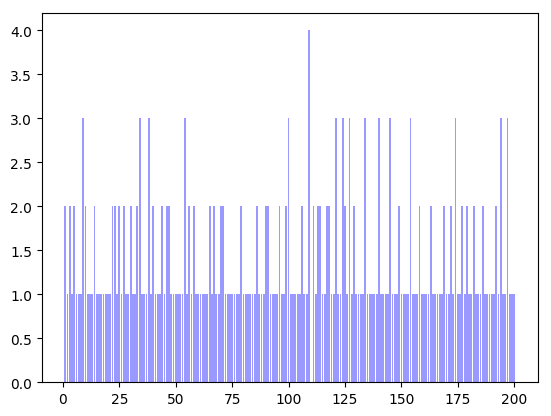

(PyObject <matplotlib.patches.Rectangle object at 0x7f37c231bf50>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c231bd10>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c23262d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c2326690>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c23269d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c2326d50>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c232f110>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c232f490>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c232f810>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c232fb90>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c232ff10>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c22ba2d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c22ba650>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c22ba9d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c22bad50>,PyObject <matplotlib.pat

In [38]:
bar(range(1, 200), results, color="blue",align="center",alpha=0.4)

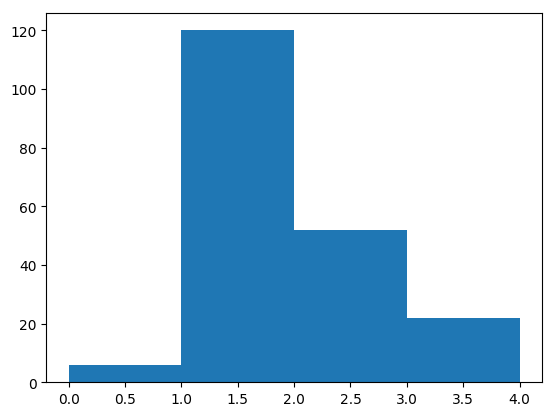

([6.0,120.0,52.0,22.0],[0.0,1.0,2.0,3.0,4.0],Any[PyObject <matplotlib.patches.Rectangle object at 0x7f37c28c0310>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c28c00d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c28c0610>,PyObject <matplotlib.patches.Rectangle object at 0x7f37c28c09d0>])

In [34]:
h = plt[:hist](results,4) # Histogram
#gcf() # Needed for IJulia to plot inline